# Bike Sharing Assignment

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1: Reading and Understanding the Data


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing NumPy and Pandas and read the required dataset
import numpy as np
import pandas as pd

# Importing Seaborn and Matplotlib for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the data

boom_bikes_df = pd.read_csv('day.csv')
boom_bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boom_bikes_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
# Look at the shape of data

boom_bikes_df.shape

(730, 16)

In [6]:
# Look at the each attribute of the dataframe and see if any null values are there

boom_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### As our dataset does not have any null value, we can skip the step of null value treatment and move ahead with the analysis

In [7]:
boom_bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Analyse the categorical variables which are represented by Numerical data and convert them into labels for better understanding

In [8]:
boom_bikes_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [9]:
boom_bikes_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
boom_bikes_df.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [11]:
# Column conversion
# We will now put labels on the columns 'season', 'weekday' and 'weathersit' for better understanding
# We will also provide labels to month column, that is 1 for Jan, 2 is for Feb and so on.

boom_bikes_df['season'] = boom_bikes_df['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})

boom_bikes_df['weathersit'] = boom_bikes_df['weathersit'].map({1:'clear',2:'cloudy', 3:'light snow/rain', 4:'heavy snow/rain'})

boom_bikes_df['weekday'] = boom_bikes_df['weekday'].map({0:'Tues', 1:'Wed', 2:'Thurs', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon'})

boom_bikes_df['mnth'] = boom_bikes_df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                                                  9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})


In [12]:
boom_bikes_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
618,619,11-09-2019,fall,1,Sep,0,Thurs,1,clear,23.677500,27.71460,52.0000,6.167631,1070,6697,7767
337,338,04-12-2018,winter,0,Dec,0,Tues,0,clear,13.564153,17.45500,77.5833,5.625206,634,2851,3485
102,103,13-04-2018,summer,0,Apr,0,Fri,1,cloudy,16.912500,20.86415,81.9167,16.791339,209,1953,2162
609,610,02-09-2019,fall,1,Sep,0,Tues,0,cloudy,28.563347,32.45000,81.5000,4.292744,2613,3197,5810
492,493,08-05-2019,summer,1,May,0,Thurs,1,cloudy,23.848347,27.87355,68.5833,19.833943,738,4990,5728


### Drop unneccesary columns

### We can get rid of following columns:
- 'instant': It is just a counter
- 'dteday': It is a date column which we do not require in our model, as we already have other derived columns from this date column
- 'atemp': We can delete this column and use 'temp' column instead because both shows the similar data we can drop one of them.
- 'casual' and 'registered': As these two columns summing up together provides the total count for 'cnt' column and we need the total demand instead of registered or casual demand. We can drop these two columns

In [13]:
# Dropping unnecessary columns

drop_columns = ['instant', 'dteday', 'atemp', 'casual', 'registered']
boom_bikes_df = boom_bikes_df.drop(drop_columns, axis=1)
boom_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [14]:
# Change the datatype of 'mnth', 'yr', 'holiday', 'workingday' to 'Category'

change_datatype = ['yr','mnth','holiday','workingday']
boom_bikes_df[change_datatype] = boom_bikes_df[change_datatype].apply(lambda x: x.astype('category'))
boom_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    object  
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    object  
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(1), object(3)
memory usage: 43.6+ KB


## Step 2: Performing EDA and Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

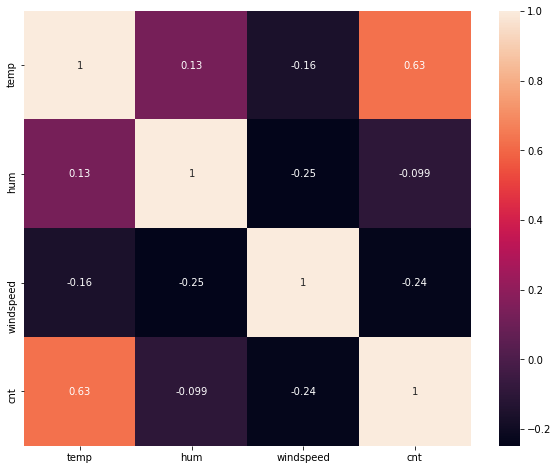

In [15]:
#Let's make a heatmap to see correlation

plt.figure(figsize=[10,8])
sns.heatmap(boom_bikes_df.corr(), annot=True)
plt.show()

##### We see that 'cnt' and 'temp' are highly correlated, Let's make a pairplot of numeric variables and see the relationship visually between these two highly correlated variables

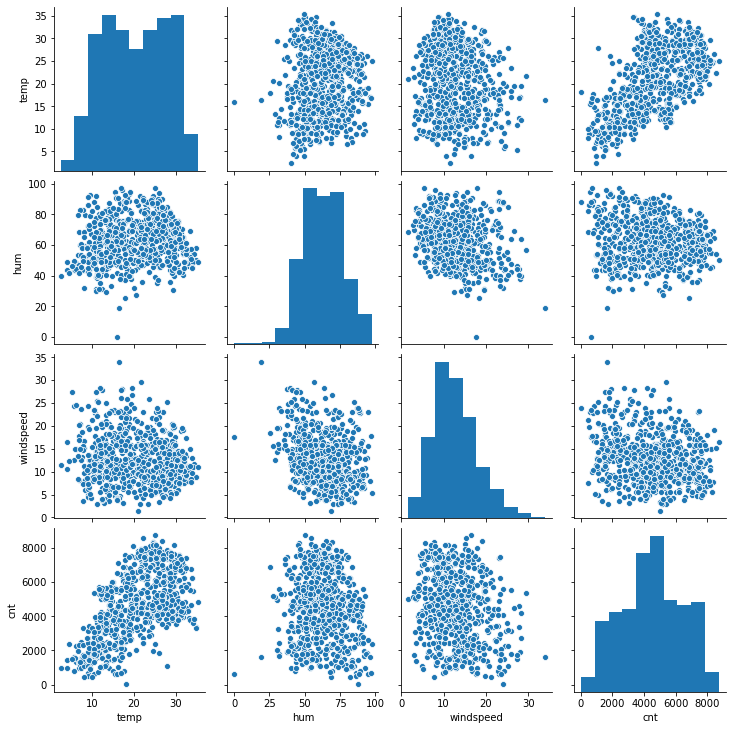

In [16]:
# Pairplot of Numeric variables

sns.pairplot(boom_bikes_df[['temp','hum','windspeed','cnt']])
plt.show()

##### We see the linear relationship between 'temp' and our target variable 'cnt'

### Univariate Analysis

In [17]:
# Providing the Figure Size and lable on y-axis in a variable

figure_size=[10,6]
ylabel="Demand"

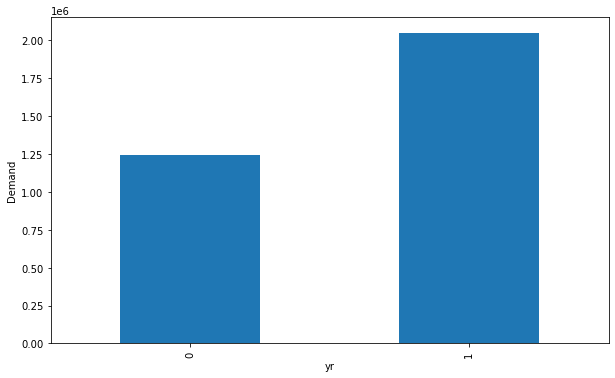

In [18]:
# Plotting a bar plot for 'yr' and 'cnt'

boom_bikes_df.groupby(['yr'])['cnt'].sum().plot.bar(figsize=figure_size)
plt.ylabel(ylabel)
plt.show()

The above graph shows that with the passing year the demand for boom bikes are increasing

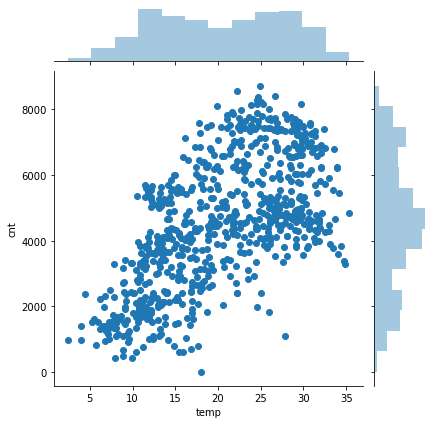

In [19]:
# Plotting a jointplot between 'yr' and 'cnt'

sns.jointplot(data=boom_bikes_df, x='temp', y='cnt')
plt.show()

There is a positive trend depicted between cnt and temp

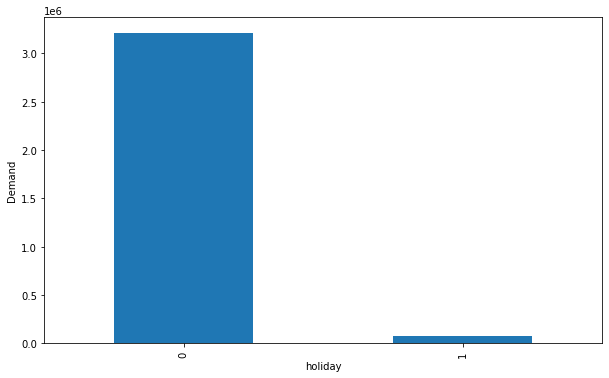

In [20]:
# Plotting a barplot between 'yr' and 'cnt'

boom_bikes_df.groupby(['holiday'])['cnt'].sum().plot.bar(figsize=figure_size)
plt.ylabel(ylabel)
plt.show()

With the above graph we see people tend hire bicycles more when there is no holiday, let's now see the demand on the working days.

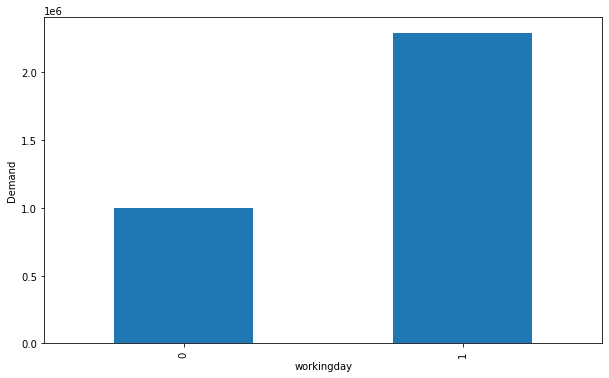

In [21]:
# Plotting a barplot between 'workingday' and 'cnt'

boom_bikes_df.groupby(['workingday'])['cnt'].sum().plot.bar(figsize=figure_size)
plt.ylabel(ylabel)
plt.show()

##### The above two graphs clearly shows that people are tend to hire bikes more when there is no holiday or we can say that the demand for bikes is more on a typical working day.
##### With this we can assume that people might hire these bikes to commute to their respective work places.

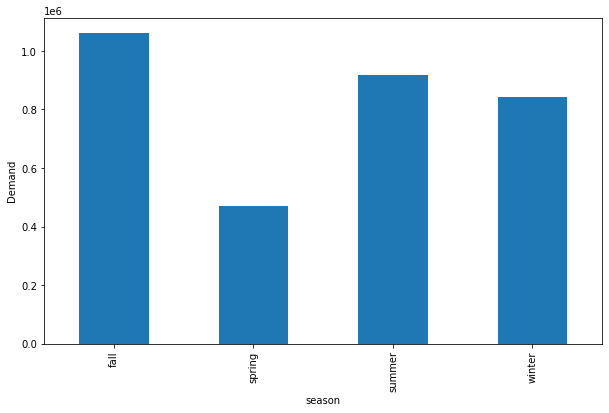

In [22]:
# Plotting a barplot between 'season' and 'cnt'

boom_bikes_df.groupby(['season'])['cnt'].sum().plot.bar(figsize=figure_size)
plt.ylabel(ylabel)
plt.show()

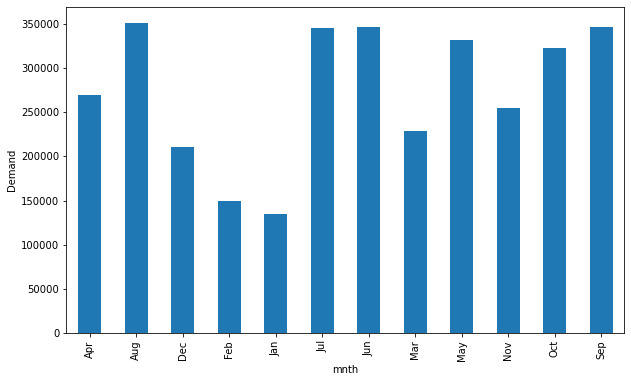

In [23]:
# Plotting a barplot between 'mnth' and 'cnt'

boom_bikes_df.groupby(['mnth'])['cnt'].sum().plot.bar(figsize=figure_size)
plt.ylabel(ylabel)
plt.show()

##### The above two plots show the demand w.r.t season and month. We found that people tend to hire more bikes in season `fall` and during the months `June, July, August` and `September` the demand was comparitively high, which again shows that these months come under `fall` season only.

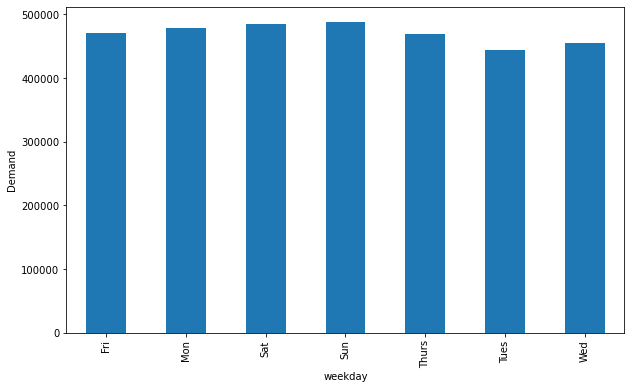

In [24]:
# Plotting a barplot between 'weekday' and 'cnt'

boom_bikes_df.groupby(['weekday'])['cnt'].sum().plot.bar(figsize=figure_size)
plt.ylabel(ylabel)
plt.show()

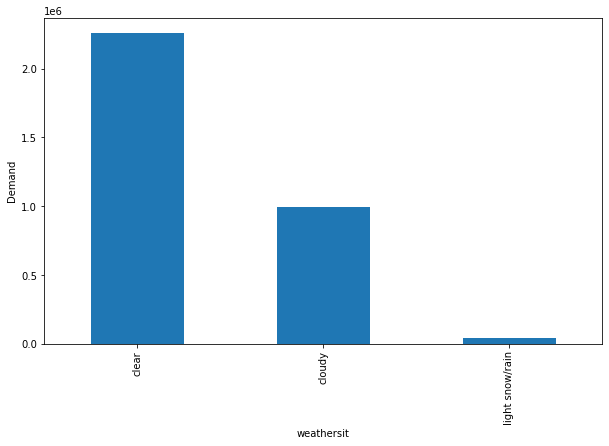

In [25]:
# Plotting a barplot between 'weathersit' and 'cnt'

boom_bikes_df.groupby(['weathersit'])['cnt'].sum().plot.bar(figsize=figure_size)
plt.ylabel(ylabel)
plt.show()

#####  With the above graph, we see the demand of bikes was very high during the clear sky.

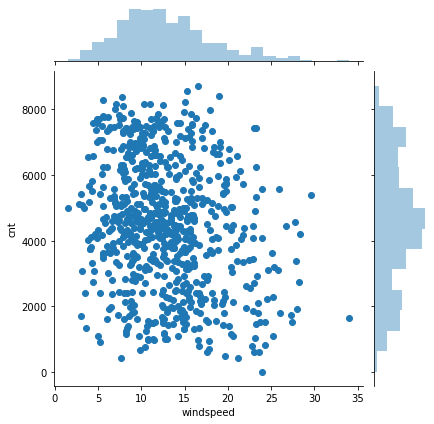

In [26]:
# Plotting a scattered graph between 'windspeed' and 'cnt'

sns.jointplot(data=boom_bikes_df, x='windspeed', y='cnt')
plt.show()

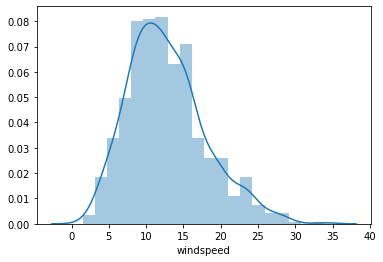

In [27]:
# Plotting a distribution graph between 'windspeed' and 'cnt'

sns.distplot((boom_bikes_df['windspeed']) , bins=20)
plt.show()

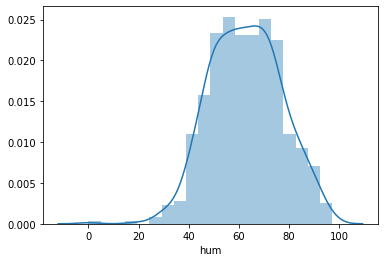

In [28]:
# Plotting a distribution graph between 'humidity' and 'cnt'

sns.distplot((boom_bikes_df['hum']) , bins=20)
plt.show()

##### With the above graphs, we analyse that the demand of bikes were high when the `windspeed` was between 7 to 13 and `humidity` was between 50 to 75

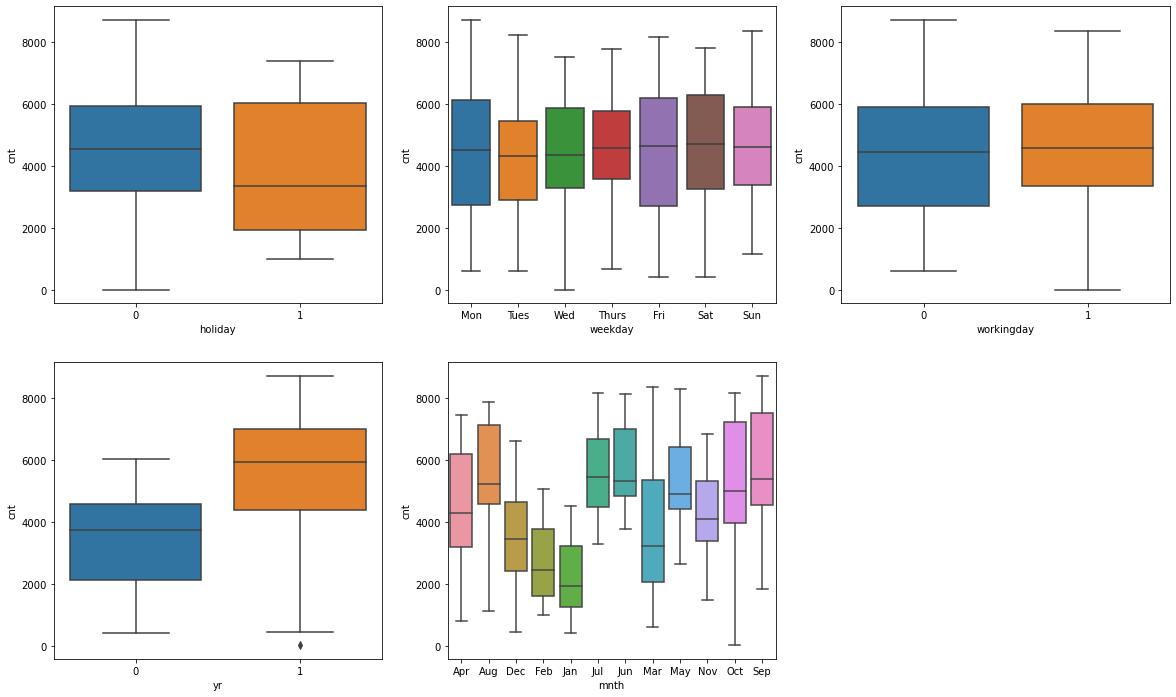

In [29]:
# Plotting boxplots for all the categorical variables to see the distribution

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = boom_bikes_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = boom_bikes_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = boom_bikes_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = boom_bikes_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = boom_bikes_df)

plt.show()

### Bivariate Analysis

In [30]:
# Creating a function to build a pivot table for Bivariate Analysis
# It takes list of columns and index

def create_pivot(col1, ind):
    return(pd.pivot_table(data=boom_bikes_df, columns=col1, values='cnt', index=ind, aggfunc='sum'))

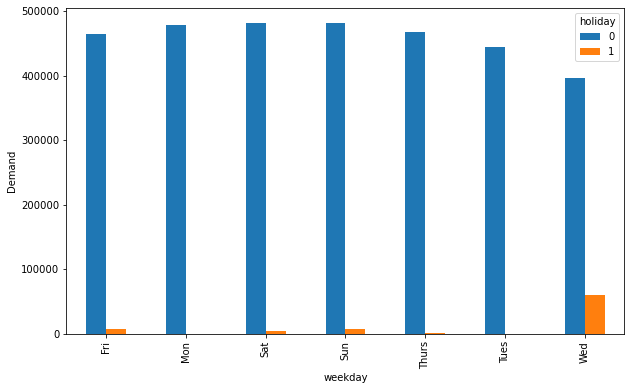

In [31]:
# Plotting a graph between 'demand' w.r.t 'holiday' and 'weekday'

create_pivot(['holiday'],['weekday']).plot.bar(figsize=figure_size)
plt.ylabel(ylabel)
plt.show()

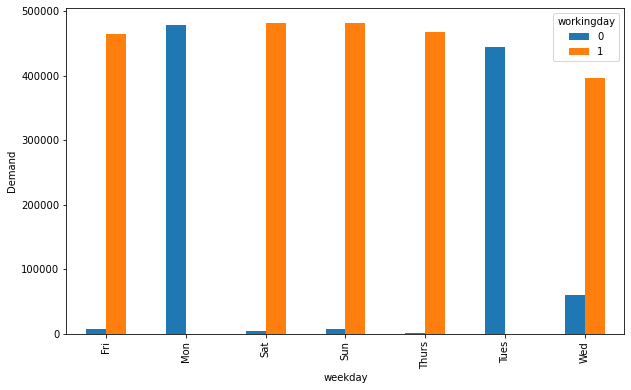

In [32]:
# Plotting a graph between 'demand' w.r.t 'workingday' and 'weekday'

create_pivot(['workingday'],['weekday']).plot.bar(figsize=figure_size)
plt.ylabel(ylabel)
plt.show()

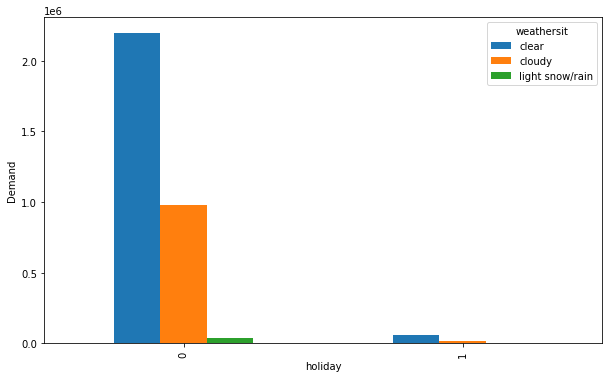

In [33]:
# Plotting a graph between 'demand' w.r.t 'weathersit' and 'holiday'

create_pivot(['weathersit'],['holiday']).plot.bar(figsize=figure_size)
plt.ylabel(ylabel)
plt.show()

##### With the above graphs we see that people tend to hire more bikes on working day when the weather is mostly clear.

#### Now that the analysis on data is done, lets move forward to create our Linear Regression model and the first step is to prepare data.

## Step 3: Data Preparation

### Dummy Variables

The variable `season` has three levels, `weekday` has seven and variable `weathersit` has four levels. So for 'm' levels of categories we will create 'm-1' dummies.
We need to convert these levels into integer as well. 

We will create `dummy variables` by using pandas library.

In [34]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_status'
weathersit_status = pd.get_dummies(boom_bikes_df['weathersit'], drop_first=True)

# Check what the dataset 'weathersit_status' looks like
weathersit_status.sample(5)

,cloudy,light snow/rain
120,1,0
76,0,0
45,0,0
459,0,0
569,0,0


In [35]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_status'
season_status = pd.get_dummies(boom_bikes_df['season'], drop_first=True)

# Check what the dataset 'season_status' looks like
season_status.sample(5)

,spring,summer,winter
515,0,1,0
632,0,0,1
445,0,1,0
2,1,0,0
514,0,1,0


In [36]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_status'
weekday_status = pd.get_dummies(boom_bikes_df['weekday'], drop_first=True)

# Check what the dataset 'weekday_status' looks like
weekday_status.sample(5)

,Mon,Sat,Sun,Thurs,Tues,Wed
535,0,0,0,0,0,0
607,0,0,1,0,0,0
338,0,0,0,0,0,1
720,1,0,0,0,0,0
341,0,1,0,0,0,0


In [37]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_status'
mnth_status = pd.get_dummies(boom_bikes_df['mnth'], drop_first=True)

# Check what the dataset 'mnth_status' looks like
mnth_status.sample(5)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
629,0,0,0,0,0,0,0,0,0,0,1
241,1,0,0,0,0,0,0,0,0,0,0
667,0,0,0,0,0,0,0,0,0,1,0
403,0,0,1,0,0,0,0,0,0,0,0
492,0,0,0,0,0,0,0,1,0,0,0


#### Now concat these dummy variables with the original dataframe and drop the columns `status`, `weekday`, `mnth` and `weathersit`.

In [38]:
# Concatinating the dataframes into a new dataframe called df_bikes

df_bikes = pd.concat([boom_bikes_df, season_status, weathersit_status, weekday_status, mnth_status], axis=1)
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Mon,0,cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tues,0,cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thurs,1,clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [39]:
# Looking at the dataframe df_bikes

df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   season           730 non-null    object  
 1   yr               730 non-null    category
 2   mnth             730 non-null    category
 3   holiday          730 non-null    category
 4   weekday          730 non-null    object  
 5   workingday       730 non-null    category
 6   weathersit       730 non-null    object  
 7   temp             730 non-null    float64 
 8   hum              730 non-null    float64 
 9   windspeed        730 non-null    float64 
 10  cnt              730 non-null    int64   
 11  spring           730 non-null    uint8   
 12  summer           730 non-null    uint8   
 13  winter           730 non-null    uint8   
 14  cloudy           730 non-null    uint8   
 15  light snow/rain  730 non-null    uint8   
 16  Mon              730 non-null    uint8   
 1

#### For creating a Linear Model, the datatype should be numeric. For variables with labels, we created dummy variables which are in binary from

In [40]:
# Converting the types from 'category' to 'integer'

change_datatype = ['yr','holiday','workingday']
df_bikes[change_datatype] = df_bikes[change_datatype].apply(lambda x: x.astype('int32'))
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   season           730 non-null    object  
 1   yr               730 non-null    int32   
 2   mnth             730 non-null    category
 3   holiday          730 non-null    int32   
 4   weekday          730 non-null    object  
 5   workingday       730 non-null    int32   
 6   weathersit       730 non-null    object  
 7   temp             730 non-null    float64 
 8   hum              730 non-null    float64 
 9   windspeed        730 non-null    float64 
 10  cnt              730 non-null    int64   
 11  spring           730 non-null    uint8   
 12  summer           730 non-null    uint8   
 13  winter           730 non-null    uint8   
 14  cloudy           730 non-null    uint8   
 15  light snow/rain  730 non-null    uint8   
 16  Mon              730 non-null    uint8   
 1

In [41]:
# Drop 'weekday', 'season' and 'weathersit' as we have created dummies for these
# We can also drop 'mnth' variable, as we see earlier it is related to 'season' and can be defined by 'season' variable only

df_bikes.drop(['weekday','season', 'weathersit','mnth'],axis=1, inplace=True)
df_bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
# Looking at the shape of the dataframe

df_bikes.shape

(730, 29)

## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [43]:
# Importing packages for creating training and test set. 
# We will keep 70% data to train our model and will test the model on the remaining 30%
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bikes_train, bikes_test = train_test_split(df_bikes, train_size = 0.7, test_size = 0.3, random_state=100)

In [44]:
# Looking at the shape of train and test sets respectively.

print(bikes_train.shape)
print(bikes_test.shape)

(510, 29)
(219, 29)


### Scaling the Features 
Using MinMax scaling

In [45]:
# Importing packages

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
# Apply scaler() to all the columns except the 'binary' and 'dummy' variables

num_cols = ['temp', 'hum', 'windspeed', 'cnt']

bikes_train[num_cols] = scaler.fit_transform(bikes_train[num_cols])

In [47]:
bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Looking at the min max values of the dataframe after performing scaling

bikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [49]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

## Step 5: Building a linear model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [50]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('cloudy', False, 2),
 ('light snow/rain', True, 1),
 ('Mon', False, 4),
 ('Sat', False, 17),
 ('Sun', False, 16),
 ('Thurs', False, 14),
 ('Tues', False, 12),
 ('Wed', False, 13),
 ('Aug', False, 11),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 18),
 ('Mar', False, 19),
 ('May', False, 10),
 ('Nov', False, 7),
 ('Oct', False, 15),
 ('Sep', True, 1)]

In [52]:
# Storing all the RFE selected features in a variable

features_selected = X_train.columns[rfe.support_]
features_selected

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'light snow/rain', 'Jul', 'Sep'],
      dtype='object')

In [53]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[features_selected]
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int32  
 1   holiday          510 non-null    int32  
 2   temp             510 non-null    float64
 3   hum              510 non-null    float64
 4   windspeed        510 non-null    float64
 5   spring           510 non-null    uint8  
 6   winter           510 non-null    uint8  
 7   light snow/rain  510 non-null    uint8  
 8   Jul              510 non-null    uint8  
 9   Sep              510 non-null    uint8  
dtypes: float64(3), int32(2), uint8(5)
memory usage: 22.4 KB


### Building model using statsmodel, for the detailed statistics

Fitting a regression line through the training data using `statsmodels`. In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [54]:
# Importing the packages
import statsmodels.api as sm

In [55]:
# Adding constant to our training df 
X_train_lm1 = sm.add_constant(X_train_rfe)

In [56]:
# Running the linear model
lm_1 = sm.OLS(y_train, X_train_lm1).fit()

In [57]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.53e-184
Time:                        19:00:48   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3769      0.031     

#### As we see in the summary above, P value of all the variables is almost 0. According to our null hypothesis, i.e., coef of the variable is 0 implies that the variable is insignificant. To reject the Null Hypothesis, Pvalue should be smaller than significant value which is `0.05`

#### We also see our Rsquared and adjusted Rsquared is almost 0.83, which shows the model is good enough.

#### Now we check the VIF of independent variables, to see if there is any collinearity between the independent variables. Higher the correlation, higher will be the VIF. We will accept only those variables whose VIF is smaller than `5`

In [58]:
# Calculate VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif


,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,spring,2.40
0,yr,2.06
6,winter,1.98
8,Jul,1.40
9,Sep,1.20
7,light snow/rain,1.11
1,holiday,1.04


#### We see the VIF of 'temperature' and 'humidity' is higher than 5. Lets drop `hum` first (with the highest VIF) and see if anything changes

In [59]:
# Dropping column 'hum' from train set
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int32  
 1   holiday          510 non-null    int32  
 2   temp             510 non-null    float64
 3   windspeed        510 non-null    float64
 4   spring           510 non-null    uint8  
 5   winter           510 non-null    uint8  
 6   light snow/rain  510 non-null    uint8  
 7   Jul              510 non-null    uint8  
 8   Sep              510 non-null    uint8  
dtypes: float64(2), int32(2), uint8(5)
memory usage: 18.4 KB


In [60]:
# Recalculating the VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif


,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,spring,1.61
5,winter,1.37
7,Jul,1.34
8,Sep,1.20
6,light snow/rain,1.06
1,holiday,1.04


#### After dropping the `hum` variable, we see the VIF of `temp` also decreased and now it lies within our acceptance range.
#### Now lets rebuild the model again

In [61]:
X_train_lm2 = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.33e-171
Time:                        19:00:48   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2042      0.025     

#### Now, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

#### We see the Rsquared and adjusted Rsquared is almost 0.81 now.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), lets plot the histogram of the error terms and see what it looks like.

In [62]:
y_train_pred = lm_2.predict(X_train_lm2)

In [63]:
# Storing the values of errors in residual
residual = y_train - y_train_pred

Text(0.5, 0, 'Errors')

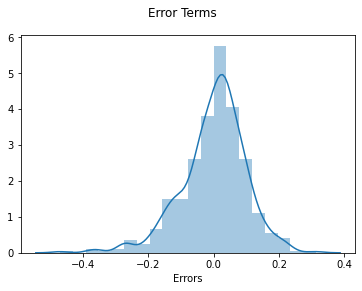

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residual), bins=20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')

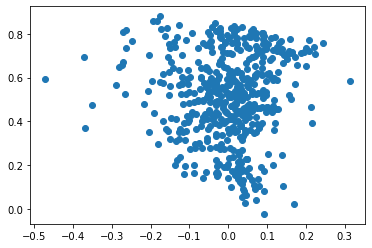

In [65]:
# Checking if errors are independent and does not follow any trend
plt.scatter(residual, y_train_pred)
plt.show()

##### From the above two graphs we see, that errors are normally distributed and does not follow any trend, thus they are independent of each other. With these assumptions being satisfied we can move forward

#### We have fitted the model and checked the normality, independency of the error terms, it's time to make predictions using the final model.

## Step 7: Making Predictions Using the Final Model


#### Applying the scaling on the test sets

In [66]:
num_cols = ['temp', 'hum', 'windspeed', 'cnt']

bikes_test[num_cols] = scaler.transform(bikes_test[num_cols])

In [67]:
# Looking at the min max values of the variables in test set

bikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [68]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [69]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test and taking only the selected features
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [70]:
# Making predictions
y_pred = lm_2.predict(X_test_new)

## Step 8: Model Evaluation

Let's plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

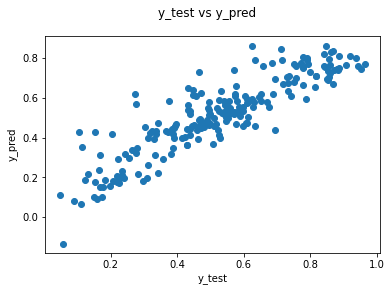

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

#### Model Evaluation through r2_score:


In [72]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7888115946045293

#### r2_score of the training set (final model) was almost 0.80 (`80%`) and r2_Score of the test set comes out to be 0.788 (`79%`), which is quite close to that of the train set. Thus, there is no case of overfitting and model is reliable.